### 1. Questions

##### 1. Investigate how demographic variables, such as rural and urban population sizes, correlate with CO2 emissions and temperature increases.
##### 2. Is there any corealtion between CO2 emission and temperature

### 2. Data Sources


#### 2.1 Dataset 1. Agri-Food CO2 Emission: 
##### The dataset,  describes CO2 emissions related to agri-food, which amount to approximately 62% of the global annual emissions. Indeed, the emissions from the agri-food sector are significant when studying climate change. As the dataset shows, these emissions contribute to a substantial portion of the global annual emissions. Understanding and addressing the environmental impact of the agri-food industry is crucial for mitigating climate change and developing sustainable practices within this sector

### 3. Data Pipeline

##### The data pipeline has three main modules: extractor, transform, and loader. Each of the modules has their respective functions. First extract csv from extractor module is used to extract the data source from URL, then delete columns from transform module deletes the list of useless columns specified for every dataset, there is a need to add total population column instead of total population male or female, and there is another transformation required which emission per person because it is directly with my main question, once all the transformations have been applied, dataset is then loaded to sqlite database using data loader module. In my Data Analytics report you can see from data extraction till Data loader in SQLlite. In this report, I am using SQLlite to fetch data and show visualization and provide insights.  


##### ![alt text](image.png)

### 4. Results and Limitations

##### Output datasets of the pipeline for all data sources are stored in sqlite database as tables as it was faster and easier to handle as a collective database, The output data from your data pipeline focuses on analyzing and visualizing the relationship between population, various agricultural activities, and average temperature changes. 
##### -> Include all essential data needed to address the selected questions
##### -> Maintain consistency in their formats.
##### -> The presentation of the datasets aligns with the requirements of the questions to be answered.

##### Factors such as industrial activities, government policies, and natural events (e.g., volcanic eruptions) can also affect CO2 emissions and temperature changes, making it difficult to isolate the impact of population changes alone. High correlation between independent variables  like rural and urban populations can affect the stability and interpretability of regression coefficients.






### Import Libraries

In [16]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
from scipy.stats import linregress
from sqlalchemy import create_engine


Extracting Data From SQL

In [8]:
## connecting to sqllite
conn = sqlite3.connect("Carbon_emission.sqlite")
cursor=conn.execute("select * from agro_food")
row_data= cursor.fetchall()
column_names=[col_name[0] for col_name in cursor.description]

In [10]:
df_agro_foods=pd.DataFrame(row_data,columns=column_names)
print(df_agro_foods)

             Area  Year  Rural population  Urban population  population  \
0     Afghanistan  1990         9655167.0         2593947.0  10694796.0   
1     Afghanistan  1991        10230490.0         2763167.0  10745167.0   
2     Afghanistan  1992        10995568.0         2985663.0  12057433.0   
3     Afghanistan  1993        11858090.0         3237009.0  14003760.0   
4     Afghanistan  1994        12690115.0         3482604.0  15455554.0   
...           ...   ...               ...               ...         ...   
6960     Zimbabwe  2016        10934468.0         5215894.0  14452705.0   
6961     Zimbabwe  2017        11201138.0         5328766.0  14751102.0   
6962     Zimbabwe  2018        11465748.0         5447513.0  15052183.0   
6963     Zimbabwe  2019        11725970.0         5571525.0  15354607.0   
6964     Zimbabwe  2020        11980005.0         5700460.0  15669667.0   

      total_emission  emission_per_person  Average Temperature °C  \
0        2198.963539          

#### Plot to show trend of temperature from previous year 


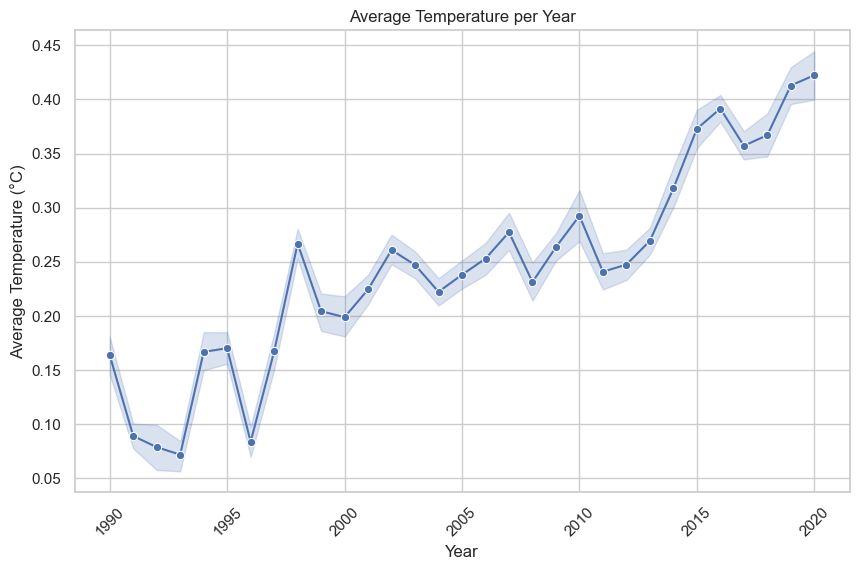

In [35]:
max_temp = df_agro_foods['Average Temperature °C'].max()
df_agro_foods['Normalized_Average_Temperature'] = df_agro_foods['Average Temperature °C'] / max_temp


sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Normalized_Average_Temperature', data=df_agro_foods, marker='o')
plt.title('Average Temperature per Year')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

##### Since 1990, global temperature increases are driven by methane, nitrous oxide, and fluorinated gases. Deforestation and industrial activities emit large amounts of greenhouse gases. Agriculture releases methane and nitrous oxide, while transportation and energy production burn fossil fuels. Urbanization increases emissions, and feedback mechanisms, like reduced albedo from melting ice, further accelerate warming.


##### lets explore more like which country or region produces more CO2 or which industry being activately participate in this disaster 

#### Above are top 20 counries, where the average temperature is quite high
 

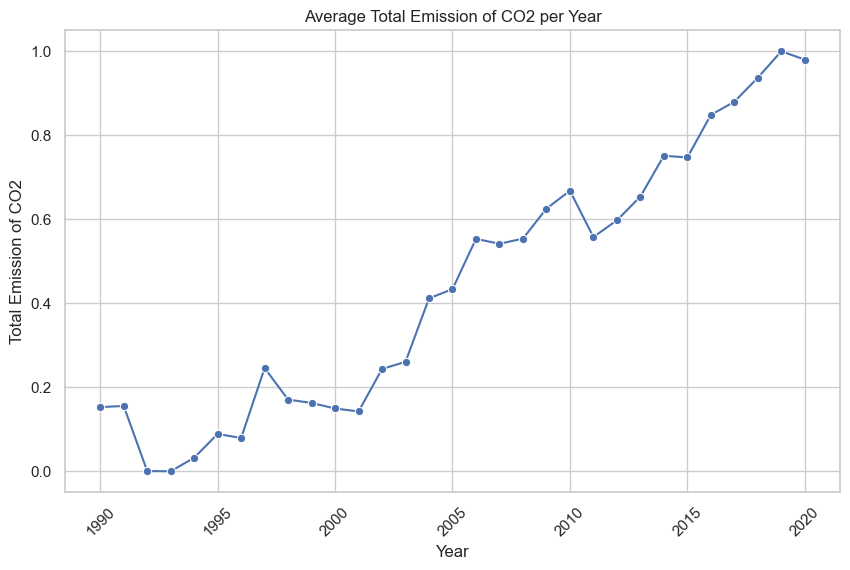

In [33]:
avg_emission_per_year = df_agro_foods.groupby('Year')['total_emission'].mean().reset_index()
avg_emission_per_year['total_emission_normalized'] = (avg_emission_per_year['total_emission'] - avg_emission_per_year['total_emission'].min()) / (avg_emission_per_year['total_emission'].max() - avg_emission_per_year['total_emission'].min())

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='total_emission_normalized', data=avg_emission_per_year, marker='o')
plt.title('Average Total Emission of CO2 per Year')
plt.xlabel('Year')
plt.ylabel('Total Emission of CO2')
plt.xticks(rotation=45)
plt.show()

#### Now lets find out that is there any corealation between temperature and CO2 

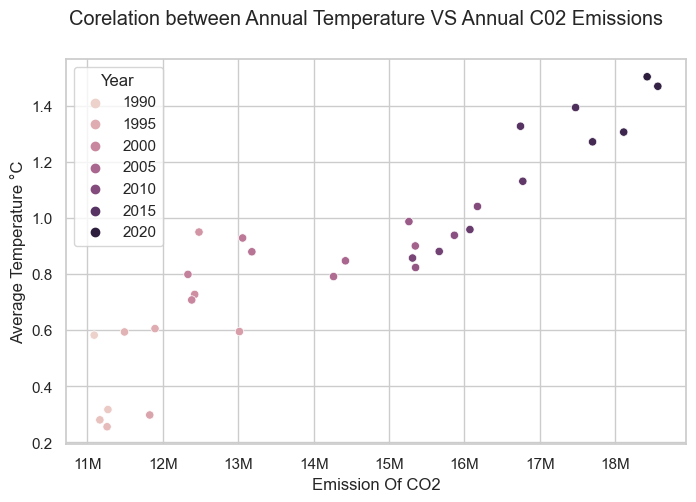

In [39]:
from matplotlib.ticker import FuncFormatter
def converter_million(num,pos):
    return  f'{num/1000000:,.0f}M'


temp_df=df_agro_foods.groupby('Year').agg({'Average Temperature °C':'mean', 'total_emission':'sum'} )

fig= plt.subplots(figsize = (8, 5))
g = sns.scatterplot(data = temp_df, x = 'total_emission', y = 'Average Temperature °C', hue ='Year') 

plt.gca().xaxis.set_major_formatter(FuncFormatter(converter_million))

plt.suptitle('Corelation between Annual Temperature VS Annual C02 Emissions')
plt.xlabel('Emission Of CO2')
plt.show()


#### As we can see that Emission of CO2 and temperature both are highly corelated with each other. It means that if the emission of CO2 increases temperature also increases. Now lets find out which industry contribute more in the emission of CO2.

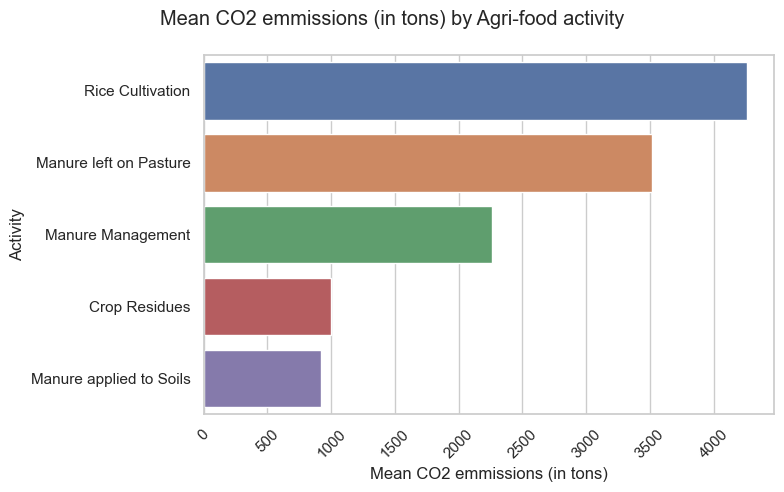

In [70]:
temp_data=df_agro_foods.iloc[:,8:-1].copy()
industry_mean=temp_data.mean()
industry_mean.sort_values(ascending = False, inplace = True) 
cols = industry_mean.index

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=industry_mean, y=cols, ax=ax) 



ax.set_ylabel("Activity")  
ax.set_xlabel("Mean CO2 emmissions (in tons)")     
fig.suptitle('Mean CO2 emmissions (in tons) by Agri-food activity')

plt.xticks(rotation=45)     
plt.tight_layout()           
plt.show()

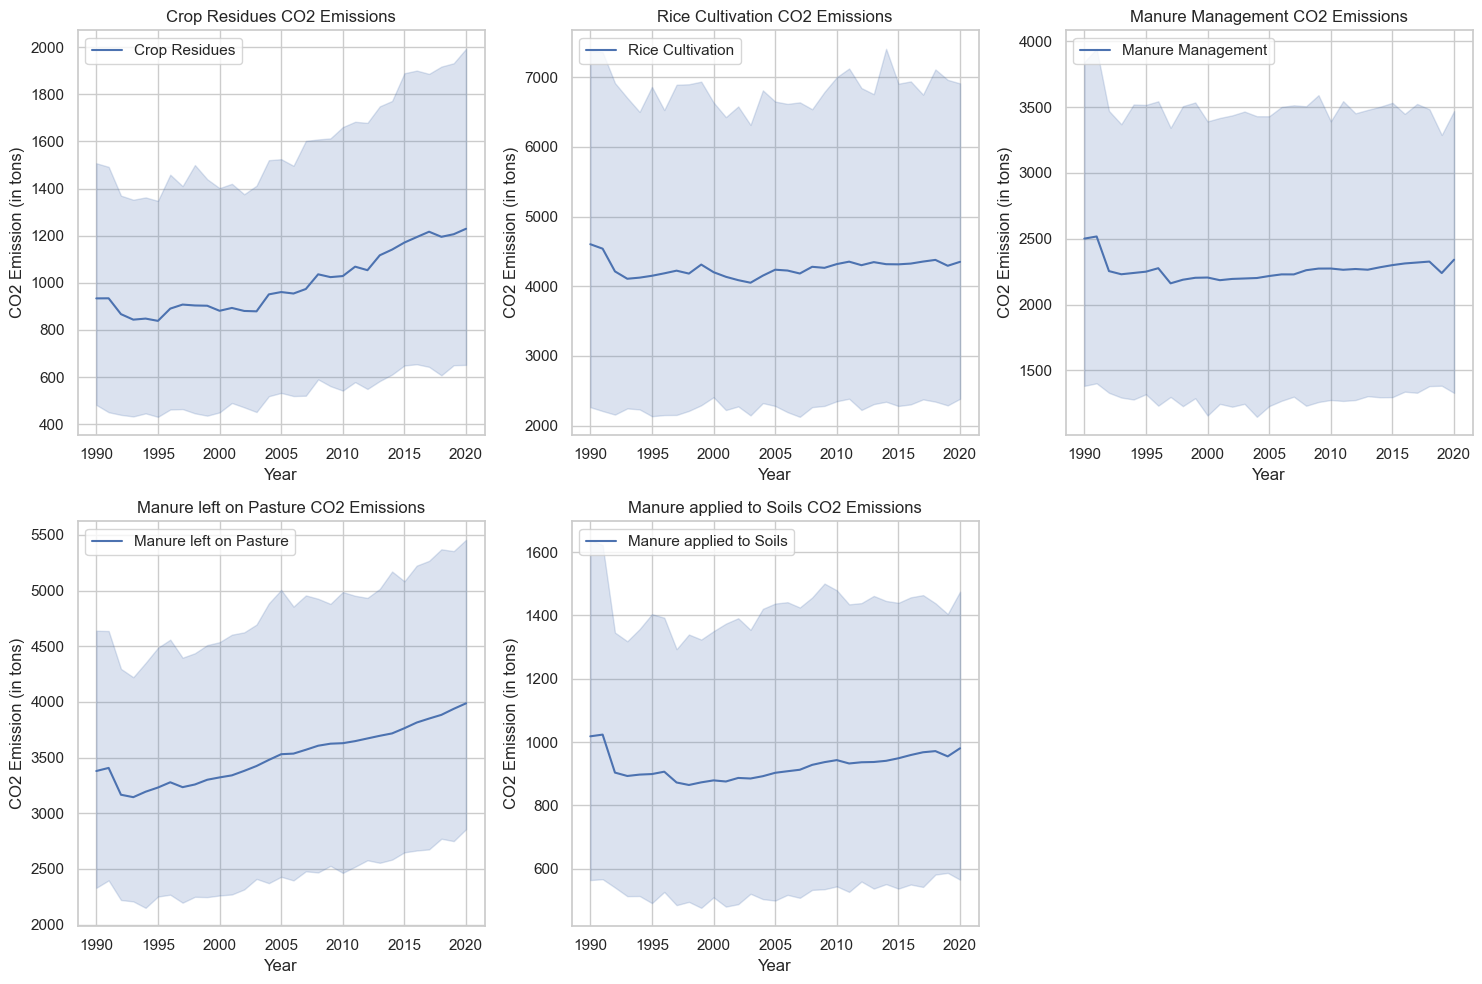

In [88]:
activities = ['Crop Residues', 'Rice Cultivation', 'Manure Management', 'Manure left on Pasture', 'Manure applied to Soils']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes = axes.flatten()




for i, activity in enumerate(activities):
    sns.lineplot(data=df_agro_foods, x='Year', y=activity, ax=axes[i])
    axes[i].set_title(f'{activity} CO2 Emissions')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('CO2 Emission (in tons)')
    axes[i].legend([activity], loc='upper left')



for j in range(len(activities), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()    

##### As you see, rice cultivating produces highest CO2 emission among others and it produces constanty same amount emission since 2005 and in second catagory we have Manure left on Pasture and Crop Residue where the tend is going upward.

#### Till now we check how temperture and CO2 corelates with each other, which industries have more impact on temperature while producing CO2. Now lets come to final topic of this report which is how population corelates with temperature and CO2.

Correlation coefficient between population and average temperature: 0.00


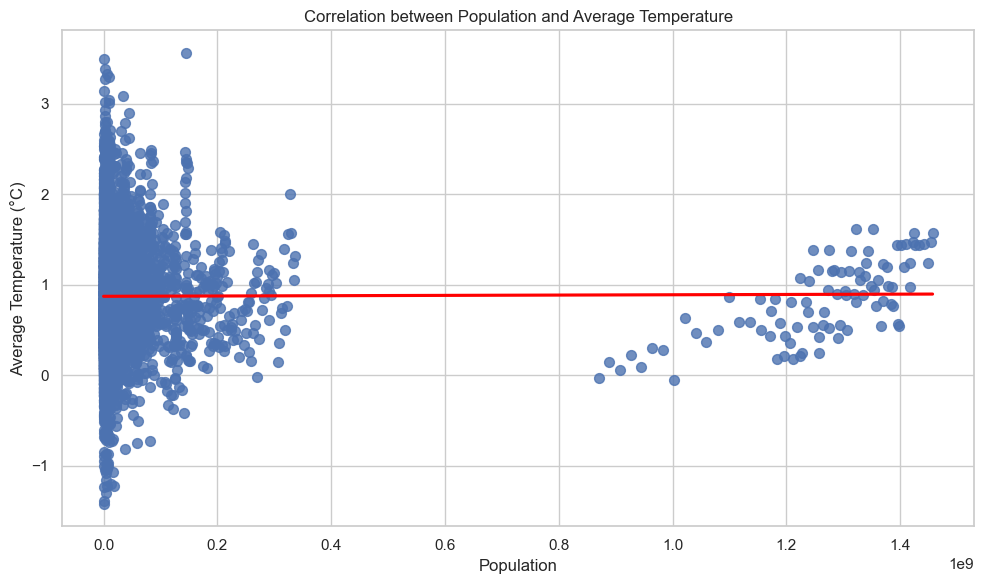

In [97]:
from scipy.stats import pearsonr

correlation, _ = pearsonr(df_agro_foods['population'], df_agro_foods['Average Temperature °C'])
print(f'Correlation coefficient between population and average temperature: {correlation:.2f}')

# Plotting the scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df_agro_foods, x='population', y='Average Temperature °C', ci=None, scatter_kws={"s": 50}, line_kws={"color": "red"})
plt.title('Correlation between Population and Average Temperature')
plt.xlabel('Population')
plt.ylabel('Average Temperature (°C)')
plt.tight_layout()
plt.show()


Correlation coefficient between population and total emission: 0.8206631659161779


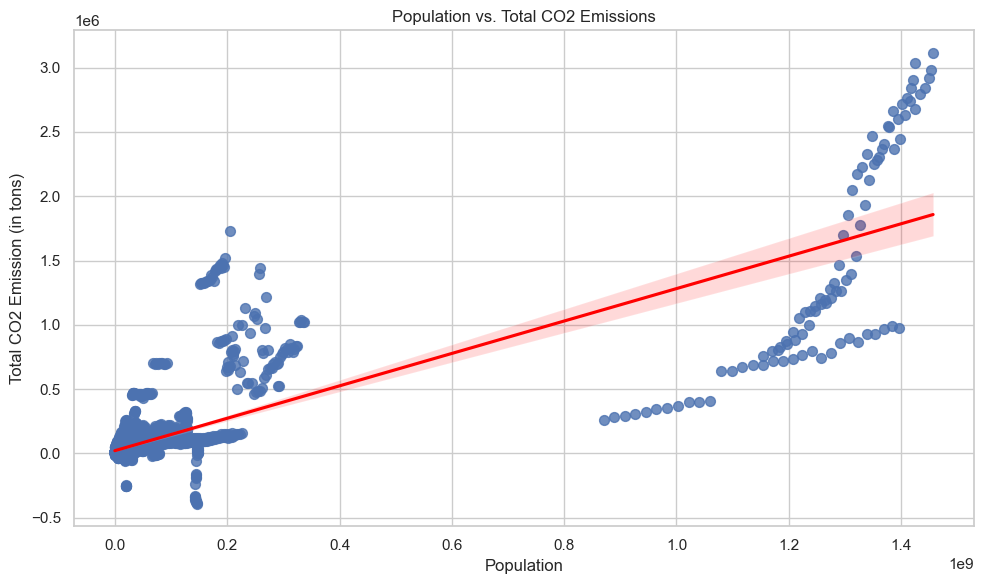

In [98]:
# Calculate the correlation coefficient
correlation = df_agro_foods['population'].corr(df_agro_foods['total_emission'])
print(f"Correlation coefficient between population and total emission: {correlation}")

# Plotting the scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df_agro_foods, x='population', y='total_emission', scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Population vs. Total CO2 Emissions')
plt.xlabel('Population')
plt.ylabel('Total CO2 Emission (in tons)')
plt.tight_layout()
plt.show()


Correlation coefficient between rural population and total emission: 0.7051617822229713
Correlation coefficient between urban population and total emission: 0.9077738135787002


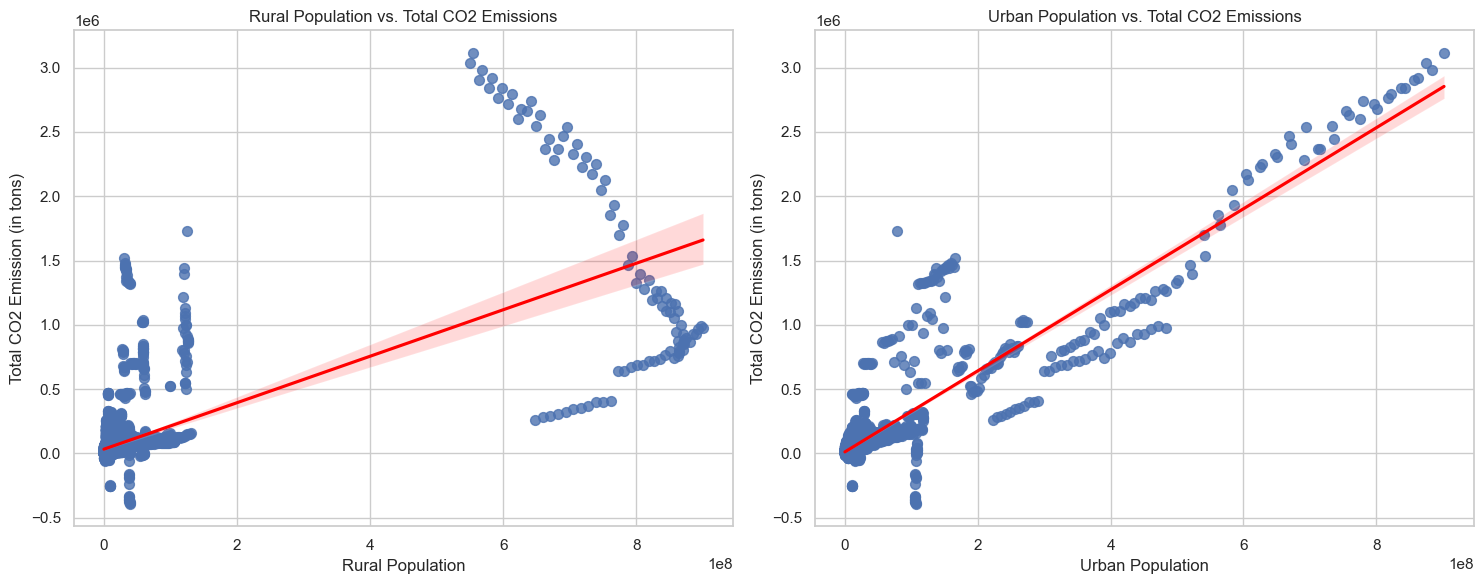

In [100]:
# Calculate the correlation coefficients
correlation_rural = df_agro_foods['Rural population'].corr(df_agro_foods['total_emission'])
correlation_urban = df_agro_foods['Urban population'].corr(df_agro_foods['total_emission'])
print(f"Correlation coefficient between rural population and total emission: {correlation_rural}")
print(f"Correlation coefficient between urban population and total emission: {correlation_urban}")

# Plotting the scatter plots with regression lines
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot for rural population
sns.regplot(data=df_agro_foods, x='Rural population', y='total_emission', ax=axes[0], scatter_kws={'s': 50}, line_kws={'color': 'red'})
axes[0].set_title('Rural Population vs. Total CO2 Emissions')
axes[0].set_xlabel('Rural Population')
axes[0].set_ylabel('Total CO2 Emission (in tons)')

# Scatter plot for urban population
sns.regplot(data=df_agro_foods, x='Urban population', y='total_emission', ax=axes[1], scatter_kws={'s': 50}, line_kws={'color': 'red'})
axes[1].set_title('Urban Population vs. Total CO2 Emissions')
axes[1].set_xlabel('Urban Population')
axes[1].set_ylabel('Total CO2 Emission (in tons)')

plt.tight_layout()
plt.show()

#### It shows the positive relationship between population and emission of CO2. If the population tends to increase emission of CO2 also increases